In [1]:
# 删除重复数据，并输出去重前后的数据量
import pandas as pd

raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  
    'label',  
    'login',  
    'id',  
    'node_id',  
    'avatar_url',  
    'gravatar_id',  
    'url',  
    'html_url',  
    'followers_url',  
    'following_url',  
    'gists_url',  
    'starred_url',  
    'subscriptions_url',  
    'organizations_url',  
    'repos_url',  
    'events_url',  
    'received_events_url',  
    'type',  
    'site_admin',  
    'name',  
    'company',  
    'blog',  
    'location',  
    'email',  
    'hireable',  
    'bio',  
    'twitter_username',  
    'public_repos',  
    'public_gists',  
    'followers',  
    'following',  
    'created_at',  
    'updated_at',
]
data = raw_data[columns]

# 删除重复数据并输出去重前后的数据量
print("去重前数据量：", len(data))
data = data.drop_duplicates()
print("去重后数据量：", len(data))

去重前数据量： 20358
去重后数据量： 19779


In [2]:
# 缺失值处理
# 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
# 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
# 最后，再次看各列有无缺失值
# 去掉gravatar_id列，并查看各列的缺失值的情况
data = data.drop('gravatar_id', axis=1)
print(data.isnull().sum())

# 将可转化成boolean变量的列字段转化成boolean变量
boolean_columns = ['site_admin', 'hireable']  # 根据实际情况可调整这里的列名列表
for col in boolean_columns:
    data[col] = data[col].astype('bool')

# 文本数据用空字符串填充空值，这里假设对'name', 'company', 'blog', 'location', 'email', 'bio', 'twitter_username'这些文本列进行处理
text_columns = ['name', 'company', 'blog', 'location', 'email', 'bio', 'twitter_username']
for col in text_columns:
    data[col] = data[col].fillna('')

# 再次看各列有无缺失值
print(data.isnull().sum())

actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64
actor_id               0
label

In [2]:
# 数据变换，将created_at、updated_at转为时间戳
data['created_at'] = pd.to_datetime(data['created_at']).astype('int64')
data['updated_at'] = pd.to_datetime(data['updated_at']).astype('int64') 

print(data[['created_at', 'updated_at']])

                created_at           updated_at
0      1317058023000000000  1697196070000000000
1      1435572766000000000  1696659974000000000
2      1220026803000000000  1696212681000000000
3      1400611389000000000  1697115299000000000
4      1345126753000000000  1696593521000000000
...                    ...                  ...
20353  1404343654000000000  1692117514000000000
20354  1512597391000000000  1690396345000000000
20355  1447512245000000000  1661288989000000000
20356  1637693729000000000  1696632645000000000
20357  1461363119000000000  1657223301000000000

[20358 rows x 2 columns]


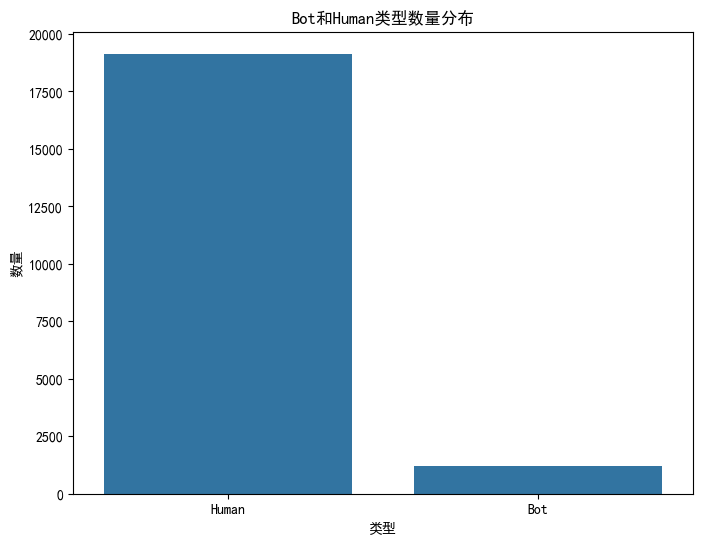

C:\Users\刘玥萌\AppData\Local\Temp\ipykernel_19052\2059822388.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_data['created_at'] = pd.to_datetime(bot_data['created_at'])


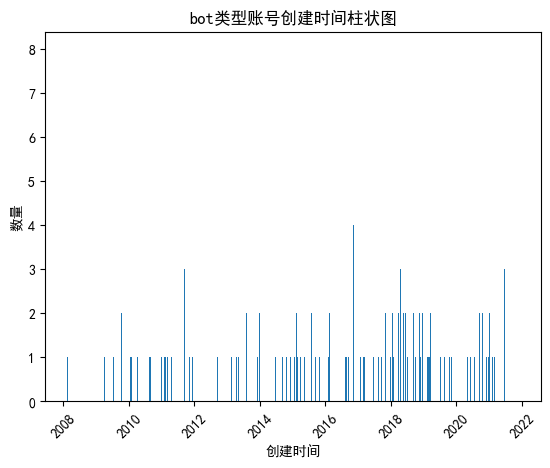

C:\Users\刘玥萌\AppData\Local\Temp\ipykernel_19052\2059822388.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_data['created_at'] = pd.to_datetime(human_data['created_at'])


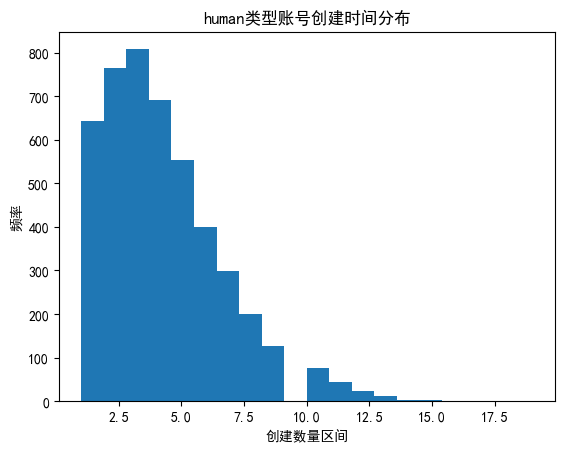

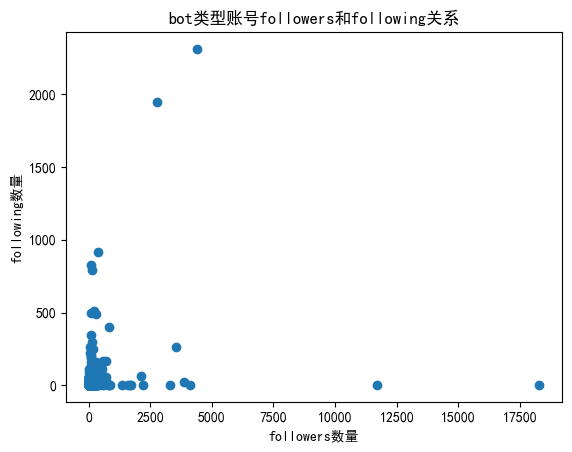

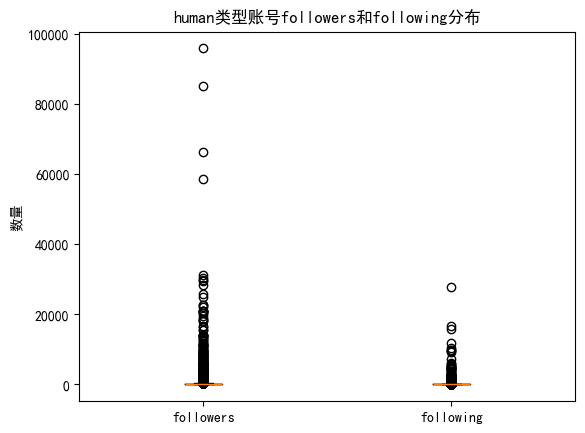

In [ ]:
# 数据可视化
# 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import pandas as pd

raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  
    'label',  
    'login',  
    'id',  
    'node_id',  
    'avatar_url',  
    'gravatar_id',  
    'url',  
    'html_url',  
    'followers_url',  
    'following_url',  
    'gists_url',  
    'starred_url',  
    'subscriptions_url',  
    'organizations_url',  
    'repos_url',  
    'events_url',  
    'received_events_url',  
    'type',  
    'site_admin',  
    'name',  
    'company',  
    'blog',  
    'location',  
    'email',  
    'hireable',  
    'bio',  
    'twitter_username',  
    'public_repos',  
    'public_gists',  
    'followers',  
    'following',  
    'created_at',  
    'updated_at',
]
data = raw_data[columns]

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 统计bot和human类型的数量
type_count = data['label'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=type_count.index, y=type_count.values)
plt.xlabel('类型')
plt.ylabel('数量')
plt.title('Bot和Human类型数量分布')
plt.show()
# 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
import datetime

# 筛选出bot类型数据
bot_data = data[data['label'] == 'Bot']

# 将created_at列转换为日期时间格式
bot_data['created_at'] = pd.to_datetime(bot_data['created_at'])

# 按创建时间分组并统计数量
created_at_counts = bot_data.groupby(bot_data['created_at'].dt.date).size()

x = created_at_counts.index
y = created_at_counts.values

fig, ax = plt.subplots()
ax.bar(x, y, width = 1)

plt.xlabel('创建时间')
plt.ylabel('数量')
plt.title('bot类型账号创建时间柱状图')
plt.xticks(rotation = 45)
plt.show()
# 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
# 筛选出human类型数据
human_data = data[data['label'] == 'Human']

# 将created_at列转换为日期时间格式
human_data['created_at'] = pd.to_datetime(human_data['created_at'])

# 按创建时间分组并统计数量
created_at_counts = human_data.groupby(human_data['created_at'].dt.date).size()

# 绘制直方图
plt.hist(created_at_counts.values, bins=20)
plt.xlabel('创建数量区间')
plt.ylabel('频率')
plt.title('human类型账号创建时间分布')
plt.show()
# 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
# 筛选出bot类型数据
bot_data = data[data['label'] == 'Bot']

# 绘制散点图
plt.scatter(bot_data['followers'], bot_data['following'])
plt.xlabel('followers数量')
plt.ylabel('following数量')
plt.title('bot类型账号followers和following关系')
plt.show()
# 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
# 筛选出human类型数据
human_data = data[data['label'] == 'Human']

# 绘制箱线图
plt.boxplot([human_data['followers'], human_data['following']])
plt.xticks([1, 2], ['followers', 'following'])
plt.ylabel('数量')
plt.title('human类型账号followers和following分布')
plt.show()

报告：
一．可视化bot和human类型的情况
（1）图表选择：柱状图
选择原因：通过柱子的高低，能够清晰直观地对比bot和human类型在数量上的差异，看出哪种类型的账号数量更多或者更少。
（2）结果分析
从绘制出的柱状图中，可以直接观察到bot和human类型账号数量的相对大小关系。human类型账号数量较多。
（3）数据洞察
通过对比数量，能初步了解在数据集中bot类型和human类型的分布情况，有助于进一步分析不同类型账号在其他属性上的差异是否与数量差异有关。
二．可视化bot类型账号的created_at情况
（1）图表选择：柱状图
选择原因：能够清晰地呈现出不同时间点上bot账号创建数量的变化。每个柱子代表一个特定的日期，柱子的高度对应当天创建的bot账号数量，这样可以直观地观察到创建数量随时间的波动趋势。
（2）结果分析
图中展示了bot账号在不同日期的创建数量分布。可能会发现某些时间段内创建的bot账号数量较多，而在其他时间段则相对较少。
（3）数据洞察
可以根据趋势判断存在某些外部因素影响了bot类型账号的创建，比如特定项目的开展、政策的变化以及技术发展的不同阶段等。同时，也可以了解bot账号创建的季节性或周期性规律，为后续的研究提供参考。
三．可视化human类型账号的created_at情况
（1）图表选择：直方图
选择原因：可以展示human类型账号创建时间的分布情况，了解在不同时间段内human类型账号创建数量的集中程度。
（2）结果分析
直方图的形状可以显示出human类型账号创建数量在各个区间的频率高低。可能呈现出单峰、多峰或均匀分布等不同形态。如果直方图呈现单峰且偏态分布，说明大部分人类账号集中在某个时间段创建，而如果是多峰分布，则说明可能存在多个账号创建高峰期。
（3）数据洞察
这有助于分析人类用户参与相关活动的规律。若发现人类账号创建集中在某个时间段，可能与该时间段内的行业活动、社交热点或平台推广有关。通过观察分布的离散程度，可以判断人类账号创建时间的稳定性，若分布较为集中则说明创建时间相对稳定，反之则较为分散。
四．可视化bot类型账号的followers和following情况
（1）图表选择：散点图
选择原因：可以很好地展示两个变量（followers和following）之间的关系。通过将每个bot账号的followers数量和following数量对应成一个点绘制在图中，可以直接观察到两者之间是否存在某种关联模式，如正相关、负相关或无明显相关性。
（2）结果分析
在散点图中，如果点呈现出从左下角到右上角的大致趋势，则表示bot类型账号的 followers和following数量存在正相关关系，即跟随者数量多的bot往往关注的账号也较多；反之，如果呈现从左上角到右下角的趋势，则为负相关；若点分布较为随机，则说明两者之间无明显的线性关系。
（3）数据洞察
有助于了解bot账号在社交互动方面的行为模式。如果存在正相关关系，可能意味着bot账号在社交网络中的互动策略是广泛关注以获取更多的关注者；如果是负相关，则可能暗示bot账号更倾向于有针对性地关注或被关注。此外，通过观察散点的分布范围和密集程度，还可以判断bot账号在followers和following数量上的多样性和集中度。
五．可视化human类型账号的followers和following情况
（1）图表选择：箱线图
选择原因：可以清晰地展示数据的分布特征，包括中位数、四分位数、异常值等。对于human类型账号的followers和following数量，箱线图能够同时呈现出两者的分布范围、集中趋势以及是否存在异常值，方便进行对比分析。
（2）结果分析
从箱线图中可以看到代表followers和following的箱子位置、大小以及上下whisker的长度。箱子的位置反映了中位数的大小，箱子的大小表示数据的四分位间距（IQR），whisker的长度则显示了数据的大致范围。如果箱子位置较高且较大，说明该变量的中位数较大且数据较为分散；如果存在异常值，则会以单独的点显示在whisker之外。
（3）数据洞察
这有助于分析人类账号在社交影响力（followers数量）和社交活跃度（following数量）方面的差异。如果followers箱子的中位数较高且IQR较大，说明部分人类账号具有较高的社交影响力且影响力差异较大；而following箱子的情况则反映了人类账号在关注其他账号时的多样性和集中度。同时，异常值的存在可能暗示了一些特殊的人类账号，如网红账号或机构账号，它们在followers或following数量上与普通账号有较大差异，值得进一步研究。
